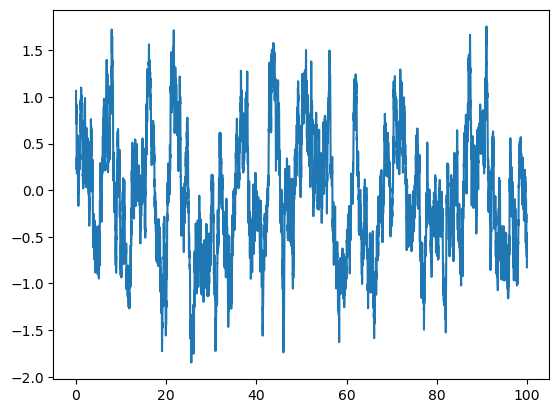

Mu: -0.056784397879517994, Std: 0.6652231187230584
P-value: 2.704203327011538e-43


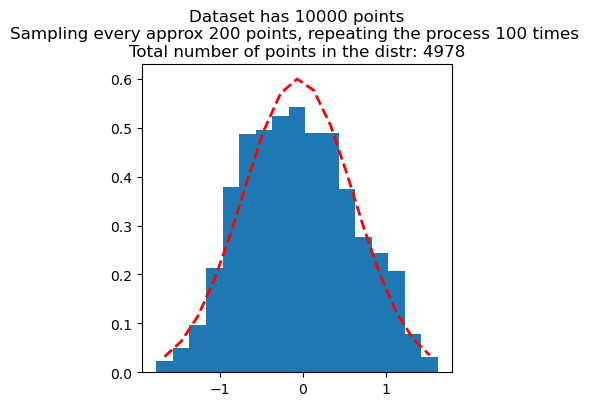

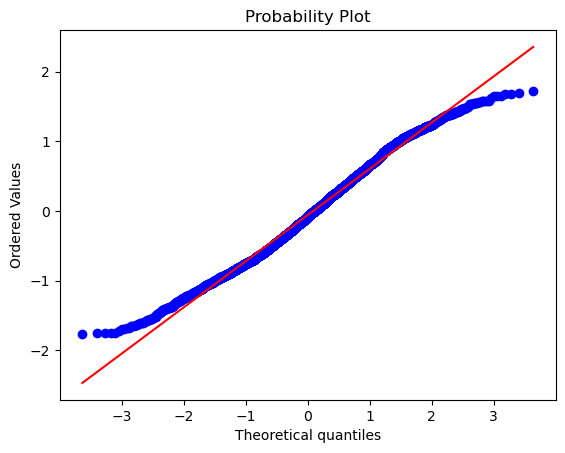

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd

from scipy.stats import norm
from scipy import stats
from math import pi

N = 5
T = 100
D = 1
dt = 0.01
x0 = 1

times = np.arange(0, T, dt)

def a(x,t):
    return  - x

def sigma(x,t):
    return 0.9


def run_stochastic(n):
    x = x0 * np.ones( (int(T/dt),n) )
    for i, t in enumerate(times):
        z = np.random.normal(0,1, (n,))
        dB = sqrt(dt) * z
        x[i] = x[i-1] + a(x[i-1], t) * dt * np.ones((n,)) + sigma(x[i-1],t) * dB * np.ones((n,))
    return x

x = run_stochastic(1)
plt.plot(times, x)
plt.show()

df = pd.Series( x.reshape((len(x),)))


## WIP !!! what if we chose a gaussian sampling? (The distance between two points is gaussian distributed)
def plot_distribution(dataset : pd.Series, lambda_ : int, n : int):

    x = np.array([0])
    # repeat the process n times
    for i in range(n):
        # we will sample the dataset choosing a value every lambda points on average (poisson distr)
        choice = [np.random.randint(lambda_)]  #choice is the vector of indices of chosen values
        for i in range(1, int(len(dataset)/lambda_) ):
            l = np.random.poisson(lambda_)
            if (int(choice[-1]+l) > len(dataset)-1):
                break
            choice.append(int(choice[-1]+l))
        #filtered data, chosen approx every lambda points
        chosen_data = (dataset.values)[choice]
        x = np.concatenate((x,chosen_data), axis = 0)

    fig, ax = plt.subplots(figsize=(4,4))
    bin_edges = np.arange(np.min(x), np.max(x), 0.2)
    ax.hist(x, bins = bin_edges, density=True)
    ax.set_title(f"Dataset has {len(dataset)} points"+ '\n'+f"Sampling every approx {lambda_} points, repeating the process {n} times " + '\n' + f"Total number of points in the distr: {len(x)}" )

    mu, std = norm.fit(x)
    print(f"Mu: {mu}, Std: {std}")

    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    ax.plot(bin_centers, norm.pdf(bin_centers, mu, std), 'r--', linewidth=2)


    # Test di Shapiro-Wilk
    stat, p_value = stats.kstest(x, "norm")
    
    print(f'P-value: {p_value}')
    _, ax2 = plt.subplots()
    stats.probplot(x, dist="norm", plot = ax2)

plot_distribution(df, 200,100)

[     0     99    214 ... 199931 200030 200125]


IndexError: index 4065 is out of bounds for axis 0 with size 4000

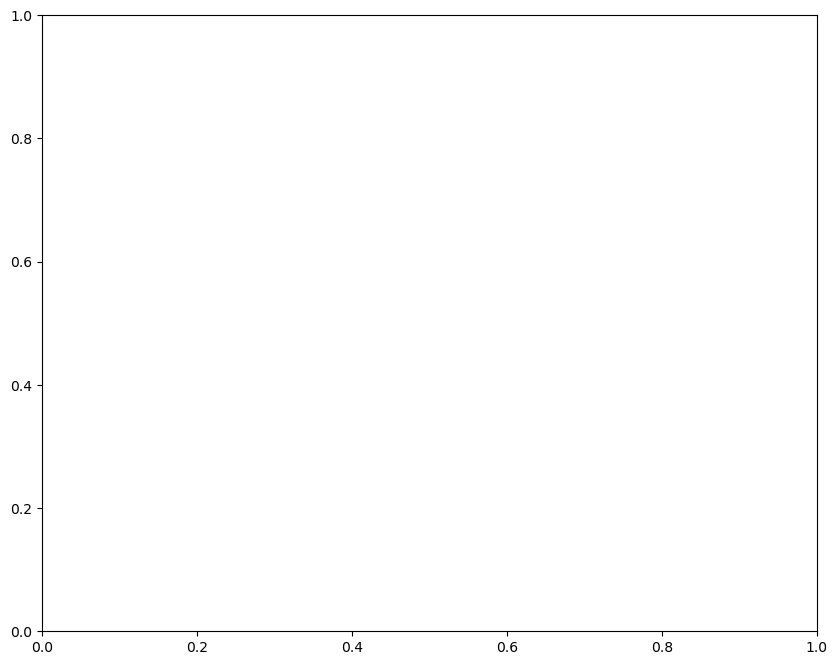

In [32]:
from scipy import stats
from scipy.optimize import curve_fit

xt = run_stochastic(1)
fig, ax = plt.subplots(figsize=(10,8))
choice = np.zeros((int(2000*100 / 100)), "int")
for i in range(1,int(2000*100 / 100)):
    l = np.random.poisson(100)
    choice[i] = int(choice[i-1]+l)
print(choice)
ax.hist(xt[choice],np.arange(np.min(xt), np.max(xt), 0.5), density = True)
ax.set_title(f"Total sampled points: {len(choice)}")
plt.show()


print(res[1]**2)